In [2]:
import numpy as np
import pandas as pd
import datetime

In [7]:
data = pd.read_csv('data/附件3-气象数据.csv')
data

,日期,天气状况,最高温度,最低温度,白天风力风向,夜晚风力风向
0,2018年1月1日,多云/多云,22℃,12℃,无持续风向<3级,无持续风向<3级
1,2018年1月1日,多云/多云,22℃,12℃,无持续风向<3级,无持续风向<3级
2,2018年1月2日,多云/多云,22℃,15℃,无持续风向<3级,无持续风向<3级
3,2018年1月3日,多云/阴,23℃,15℃,无持续风向<3级,无持续风向<3级
4,2018年1月4日,多云/小雨,21℃,16℃,无持续风向<3级,无持续风向<3级
...,...,...,...,...,...,...
1340,2021年8月27日,雷阵雨/雷阵雨,35℃,26℃,北风1-2级,北风1-2级
1341,2021年8月28日,雷阵雨/多云,33℃,26℃,北风1-2级,北风1-2级
1342,2021年8月29日,雷阵雨/雷阵雨,32℃,25℃,北风1-2级,北风1-2级
1343,2021年8月30日,阵雨/阵雨,34℃,26℃,北风1-2级,北风1-2级


### 对气候数据进行如下处理
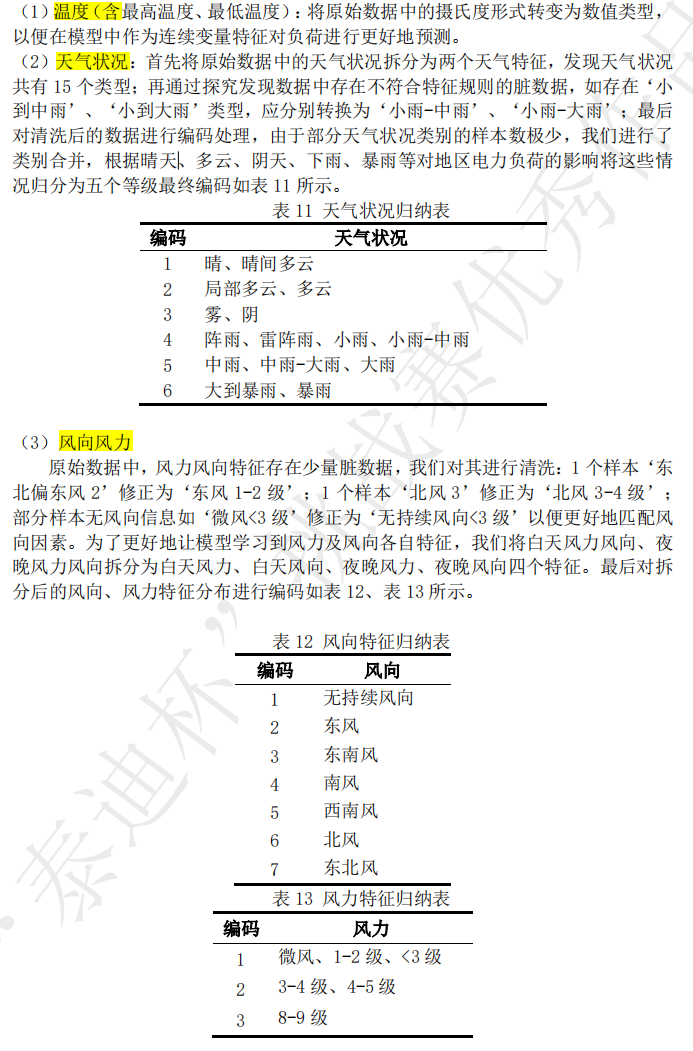
由于excel使用的方便性，直接用excel进行处理

In [33]:
data1 = pd.read_excel('data\附件3-气象数据(初步处理).xlsx')
data1.index = pd.to_datetime(data1['日期'])
# data1 = data1.drop('日期',axis=1)
data1

,日期,天气状况1,天气状况2,最高温度,最低温度,白天风力风向,夜晚风力风向,夜晚风向,夜晚风力,白天风向,白天风力,天气状况1编码,天气状况2编码,夜晚风向编码,夜晚风力编码,白天风向编码,白天风力编码
日期,,,,,,,,,,,,,,,,,
2018-01-01,2018-01-01,多云,多云,22,12,无持续风向<3级,无持续风向<3级,无持续风向,<3,无持续风向,<3,2,2,1,1,1,1
2018-01-01,2018-01-01,多云,多云,22,12,无持续风向<3级,无持续风向<3级,无持续风向,<3,无持续风向,<3,2,2,1,1,1,1
2018-01-02,2018-01-02,多云,多云,22,15,无持续风向<3级,无持续风向<3级,无持续风向,<3,无持续风向,<3,2,2,1,1,1,1
2018-01-03,2018-01-03,多云,阴,23,15,无持续风向<3级,无持续风向<3级,无持续风向,<3,无持续风向,<3,2,3,1,1,1,1
2018-01-04,2018-01-04,多云,小雨,21,16,无持续风向<3级,无持续风向<3级,无持续风向,<3,无持续风向,<3,2,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,2021-08-27,雷阵雨,雷阵雨,35,26,北风1~2级,北风1~2级,北风,1~2,北风,1~2,4,4,6,1,6,1
2021-08-28,2021-08-28,雷阵雨,多云,33,26,北风1~2级,北风1~2级,北风,1~2,北风,1~2,4,2,6,1,6,1
2021-08-29,2021-08-29,雷阵雨,雷阵雨,32,25,北风1~2级,北风1~2级,北风,1~2,北风,1~2,4,4,6,1,6,1


In [34]:
pdates = pd.date_range(start = data1.index[0],end=data1.index[-1])  # 完整日期
print(len(pdates),len(data1))   # 完整日期长度为1339，表格中数据长度为1345，说明有重复值

1339 1345


In [35]:
# 打印重复值
data1[data1.duplicated()]    # data1.duplicated() 返回布尔型数据，告诉重复值位置

,日期,天气状况1,天气状况2,最高温度,最低温度,白天风力风向,夜晚风力风向,夜晚风向,夜晚风力,白天风向,白天风力,天气状况1编码,天气状况2编码,夜晚风向编码,夜晚风力编码,白天风向编码,白天风力编码
日期,,,,,,,,,,,,,,,,,
2018-01-01,2018-01-01,多云,多云,22,12,无持续风向<3级,无持续风向<3级,无持续风向,<3,无持续风向,<3,2,2,1,1,1,1
2020-07-04,2020-07-04,雷阵雨,雷阵雨,33,27,无持续风向1~2级,无持续风向1~2级,无持续风向,1~2,无持续风向,1~2,4,4,1,1,1,1
2020-07-05,2020-07-05,多云,多云,35,27,无持续风向1~2级,无持续风向1~2级,无持续风向,1~2,无持续风向,1~2,2,2,1,1,1,1
2020-12-03,2020-12-03,晴,晴,21,11,北风1~2级,北风1~2级,北风,1~2,北风,1~2,2,2,6,1,6,1
2021-06-04,2021-06-04,大雨,小雨,28,23,北风1~2级,北风1~2级,北风,1~2,北风,1~2,5,4,6,1,6,1
2021-06-04,2021-06-04,大雨,小雨,28,23,北风1~2级,北风1~2级,北风,1~2,北风,1~2,5,4,6,1,6,1


In [36]:
#inplace=True表示直接在源数据上进行操作
data1.drop_duplicates(inplace=True) 

In [43]:
data1.describe() # 数据没有缺失值了，温度数据看着也基本正确

,最高温度,最低温度,天气状况1编码,天气状况2编码,夜晚风向编码,夜晚风力编码,白天风向编码,白天风力编码
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,27.609410,20.312920,3.119492,2.893204,2.647498,1.091113,2.666916,1.097087
std,6.296529,6.123656,1.172327,1.087958,2.314189,0.290462,2.317065,0.298700
min,7.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,16.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,28.000000,21.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,33.000000,26.000000,4.000000,4.000000,6.000000,1.000000,6.000000,1.000000
max,38.000000,29.000000,7.000000,7.000000,7.000000,3.000000,7.000000,3.000000


In [50]:
imputed_data = pd.read_excel('impute_data.xlsx')
imputed_data.index = imputed_data['Unnamed: 0']
imputed_data = imputed_data.drop('Unnamed: 0',axis=1)
imputed_data.index.name = '日期'
imputed_data

,节点0功率,节点1功率,节点2功率,节点3功率,节点4功率,节点5功率,节点6功率,节点7功率,节点8功率,节点9功率,...,节点86功率,节点87功率,节点88功率,节点89功率,节点90功率,节点91功率,节点92功率,节点93功率,节点94功率,节点95功率
日期,,,,,,,,,,,,,,,,,,,,,
2018-01-01,244033.7682,232720.6402,231685.6891,227581.3317,233482.4269,224464.7554,223881.3222,221522.7156,228138.5805,220047.4568,...,234535.8695,232184.9459,238362.0286,228433.3587,224915.6451,222615.9423,225228.9648,213662.3933,209709.2317,205839.6378
2018-01-02,207655.1990,200673.8192,199179.7267,199204.4665,213530.4627,192532.5988,188883.3155,188022.8548,194513.1024,187211.6824,...,269290.6416,267889.5761,271585.0201,263482.9724,260430.3031,268515.5360,260295.6097,270992.1341,250472.5514,244224.2000
2018-01-03,248503.4810,236440.6647,233974.9909,232474.0213,235308.6404,231016.0498,230976.8460,226422.5222,233703.3045,227215.1967,...,274789.8773,274039.4817,280565.2247,289556.1424,266657.4444,264818.1174,268641.5741,255383.4266,253372.3768,247607.8786
2018-01-04,253310.1506,244545.2255,239774.3340,242000.7265,245132.8146,236083.3085,236025.2417,233812.6096,242392.4277,229510.9984,...,271083.3414,269644.6551,278659.1120,268758.0021,264407.4489,263243.3501,266465.7950,255016.3169,252476.5852,246234.4829
2018-01-05,251749.1014,243126.3908,239751.1917,238086.1316,242231.9352,234582.4407,234513.2381,231791.2725,236081.0479,227392.3428,...,276483.8019,281264.4793,283348.3320,272798.8725,271016.2719,266879.9107,271510.8157,257809.0623,253594.7963,252019.4440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,223670.7666,211582.9503,210209.1440,208946.6294,221878.3237,205769.3276,205547.4612,204603.6416,218074.4830,202712.6189,...,218872.6151,217206.6065,230826.4669,213102.5979,212090.3762,211056.1556,227035.5852,211094.3287,209867.7853,207664.4476
2021-08-28,223349.5616,211764.0453,210494.4611,211151.4495,222604.7910,207883.8180,207955.5242,203974.3065,219258.9309,202648.5327,...,218859.4107,216779.7621,230144.0307,213149.9247,211506.2093,210342.8845,223441.6077,208200.8319,208507.1714,206999.8723
2021-08-29,222113.3896,211702.4865,211036.2858,210007.5139,224375.7399,207412.9844,206570.9228,205982.2303,218203.0552,203044.1258,...,213426.6633,213043.9812,227556.1836,208724.3182,209079.3462,207170.2737,223199.7806,208904.4145,205167.6778,204268.1608


In [52]:
imputed_data[['最高温度','最低温度','天气状况1编码','天气状况2编码','夜晚风向编码','夜晚风力编码','白天风向编码','白天风力编码']]=data1[['最高温度','最低温度','天气状况1编码','天气状况2编码','夜晚风向编码','夜晚风力编码','白天风向编码','白天风力编码']]
imputed_data

,节点0功率,节点1功率,节点2功率,节点3功率,节点4功率,节点5功率,节点6功率,节点7功率,节点8功率,节点9功率,...,节点94功率,节点95功率,最高温度,最低温度,天气状况1编码,天气状况2编码,夜晚风向编码,夜晚风力编码,白天风向编码,白天风力编码
日期,,,,,,,,,,,,,,,,,,,,,
2018-01-01,244033.7682,232720.6402,231685.6891,227581.3317,233482.4269,224464.7554,223881.3222,221522.7156,228138.5805,220047.4568,...,209709.2317,205839.6378,22,12,2,2,1,1,1,1
2018-01-02,207655.1990,200673.8192,199179.7267,199204.4665,213530.4627,192532.5988,188883.3155,188022.8548,194513.1024,187211.6824,...,250472.5514,244224.2000,22,15,2,2,1,1,1,1
2018-01-03,248503.4810,236440.6647,233974.9909,232474.0213,235308.6404,231016.0498,230976.8460,226422.5222,233703.3045,227215.1967,...,253372.3768,247607.8786,23,15,2,3,1,1,1,1
2018-01-04,253310.1506,244545.2255,239774.3340,242000.7265,245132.8146,236083.3085,236025.2417,233812.6096,242392.4277,229510.9984,...,252476.5852,246234.4829,21,16,2,4,1,1,1,1
2018-01-05,251749.1014,243126.3908,239751.1917,238086.1316,242231.9352,234582.4407,234513.2381,231791.2725,236081.0479,227392.3428,...,253594.7963,252019.4440,19,13,3,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,223670.7666,211582.9503,210209.1440,208946.6294,221878.3237,205769.3276,205547.4612,204603.6416,218074.4830,202712.6189,...,209867.7853,207664.4476,35,26,4,4,6,1,6,1
2021-08-28,223349.5616,211764.0453,210494.4611,211151.4495,222604.7910,207883.8180,207955.5242,203974.3065,219258.9309,202648.5327,...,208507.1714,206999.8723,33,26,4,2,6,1,6,1
2021-08-29,222113.3896,211702.4865,211036.2858,210007.5139,224375.7399,207412.9844,206570.9228,205982.2303,218203.0552,203044.1258,...,205167.6778,204268.1608,32,25,4,4,6,1,6,1


In [53]:
imputed_data.to_excel('imputed_data_climate.xlsx')